In [1]:
pip install pandas

In [6]:
pip install seaborn

In [3]:
pip install scikit-learn

  Using cached scikit_learn-0.24.2-cp36-cp36m-win32.whl (6.1 MB)



In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [11]:
df_test = pd.read_csv('Data/test.csv')
df_train = pd.read_csv('Data/train.csv')

df = pd.concat([df_train, df_test])

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [13]:
df_null = pd.DataFrame(df.isnull().sum(), columns=['count']).reset_index()
df_null.loc[df_null['count'] > 0]

,index,count
2,MSZoning,4
3,LotFrontage,486
6,Alley,2721
9,Utilities,2
23,Exterior1st,1
24,Exterior2nd,1
25,MasVnrType,24
26,MasVnrArea,23
30,BsmtQual,81
31,BsmtCond,82


In [14]:
# удаление дубликатов
df = df.drop_duplicates()

Text(0, 0.5, 'кол-во')

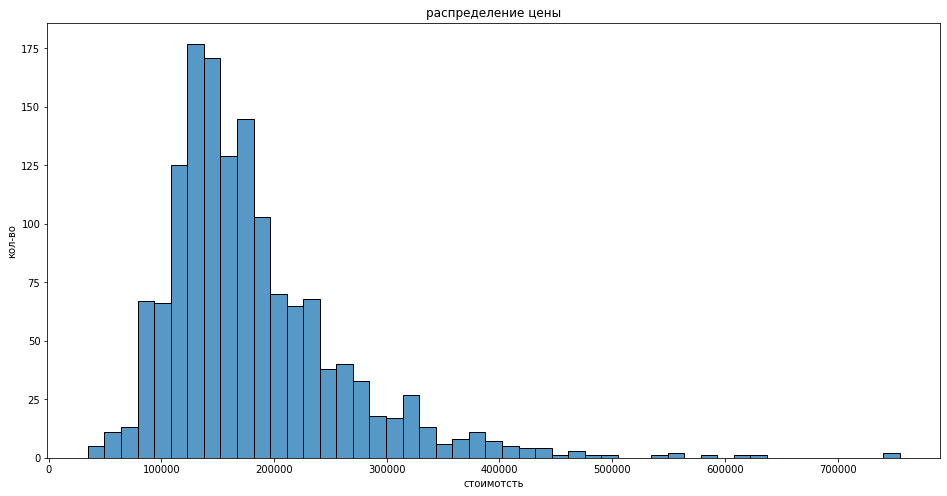

In [15]:
plt.figure(figsize=(16,8))
sns.histplot(df['SalePrice'])
plt.title('распределение цены')
plt.xlabel('стоимотсть')
plt.ylabel('кол-во')

In [16]:
#заполняем пропущенные значения модай, самым часто встречающимся значением
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
#заполняем пропущенные значения средним значением(применяем при нормальном распределении)
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())
#заполняем пропущенные значения медианным значением(применяем при ассимитричном распределении)
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].median())

In [17]:
house = df[['Neighborhood', 'SalePrice', 'OverallQual', 'YearBuilt', 'OverallCond', 'GrLivArea', 'GarageCars']].reset_index(drop=True)  
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  2919 non-null   object 
 1   SalePrice     2919 non-null   float64
 2   OverallQual   2919 non-null   int64  
 3   YearBuilt     2919 non-null   int64  
 4   OverallCond   2919 non-null   int64  
 5   GrLivArea     2919 non-null   int64  
 6   GarageCars    2919 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 148.3+ KB


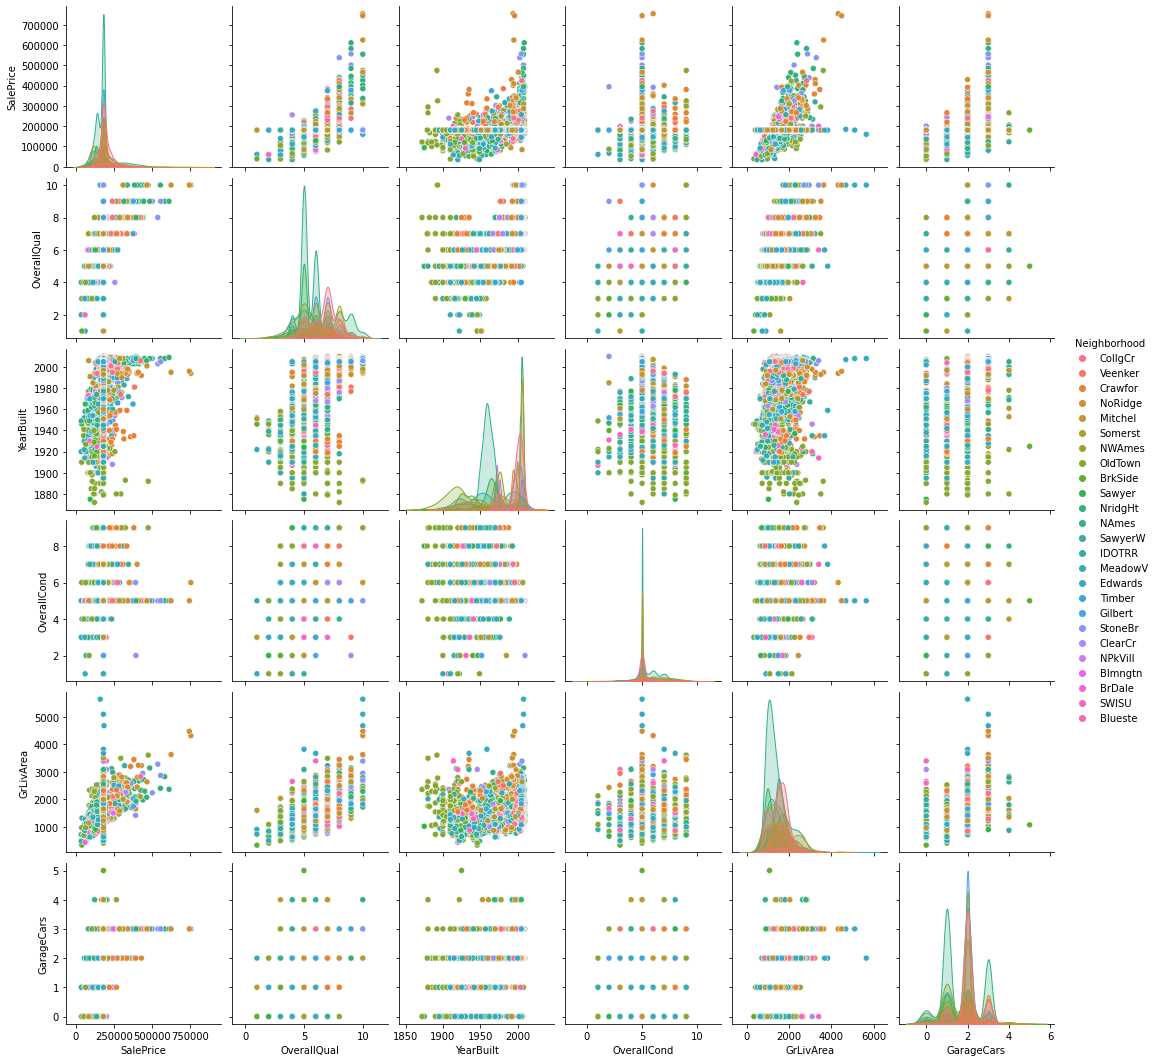

In [18]:
# исследуем виды распределений случайной величины от местоположения
sns.pairplot(house, hue='Neighborhood')

Text(0.5, 1.0, 'корреляция')

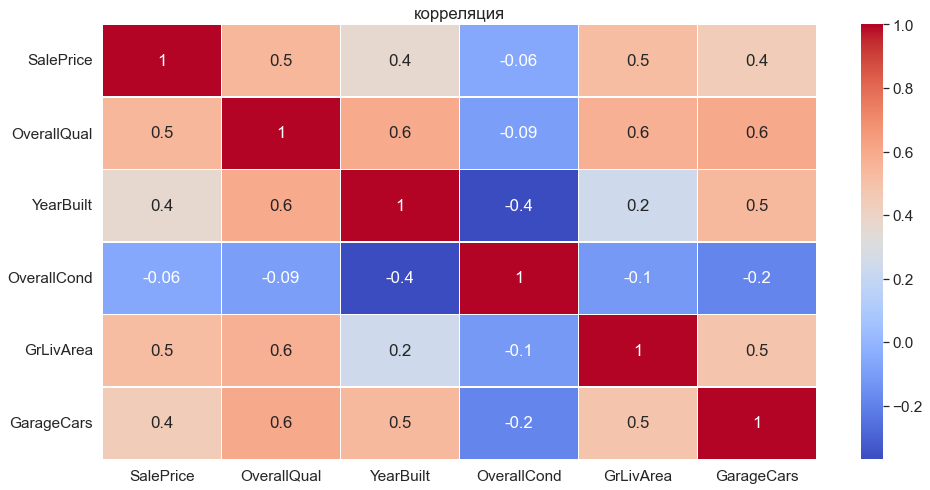

In [19]:
# определение зависимостей
corr = house.corr()
plt.figure(figsize=(16,8))
sns.set(font_scale=1.4)
sns.heatmap(corr, annot=True,linewidths=0.5,cmap='coolwarm',fmt='.1g')
plt.title('корреляция')

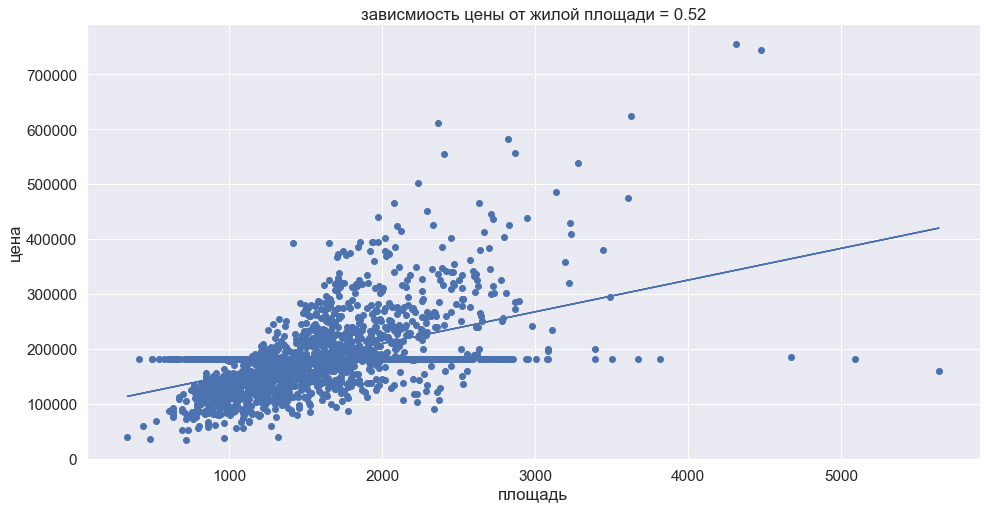

In [20]:
# рассмотрим подробно зависимоть цены от жилой площади
x = np.array(house.GrLivArea.tolist())
y = np.array(house.SalePrice.tolist())
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
plt.figure(figsize=(16,8))
plt.scatter(x, y)
plt.title(f"зависмиость цены от жилой площади = {np.corrcoef(x, y)[1][0]:.2f}")
plt.plot(x, b0 + b1 * x)
plt.xlabel('площадь')
plt.ylabel('цена')
plt.show()

In [21]:
# дополнительный признак наличия бассейна
df['Pool'] = df.PoolArea.apply(lambda value: 'yes' if (value > 0) else 'no')

In [22]:
# средняя цена домов с бассейном существенно выше, но есть он только в домах с газовым котлом
pd.crosstab(index=df['Heating'], columns=df['Pool'], values=df['SalePrice'], aggfunc='mean')

Pool,no,yes
Heating,,
Floor,72500.000000,NaN
GasA,181207.906006,238653.628872
GasW,171395.176408,NaN
Grav,98749.154642,NaN
OthW,125750.000000,NaN
Wall,121707.065297,NaN


In [23]:
# выполним one-hot encoding
df = pd.get_dummies(df, columns=['CentralAir'])

In [24]:
# выполним label-encoding столбца Utilities
df['Utilities'] = LabelEncoder().fit_transform(df['Utilities'].astype(str))

In [25]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pool,CentralAir_N,CentralAir_Y
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,no,0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,0,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,no,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,no,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,0,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,no,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,0,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,no,0,1


Text(0, 0.5, 'класс')

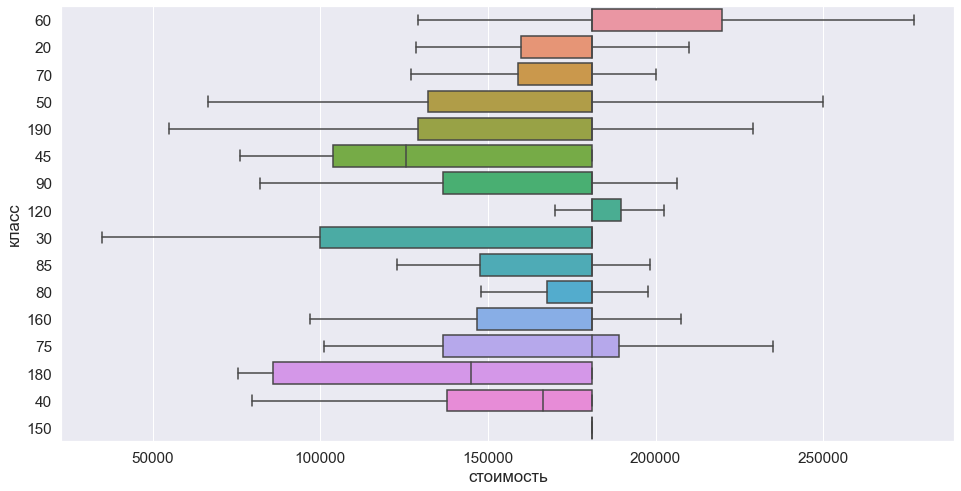

In [26]:
# выбросы box-plot
plt.figure(figsize=(16, 8))
sns.boxplot(x = df['SalePrice'], y = df['MSSubClass'].astype('str'), showfliers = False)
plt.xlabel('стоимость');
plt.ylabel('класс')

In [27]:
df.groupby('MSSubClass')['SalePrice'].agg(min='min',mean='mean',max='max').round().reset_index()

,MSSubClass,min,mean,max
0,20,35311.0,183059.0,611657.0
1,30,34900.0,138682.0,180921.0
2,40,79500.0,164390.0,260000.0
3,45,76000.0,132702.0,180921.0
4,50,37900.0,162047.0,410000.0
5,60,129000.0,211615.0,755000.0
6,70,40000.0,174289.0,359100.0
7,75,101000.0,188933.0,475000.0
8,80,107000.0,175424.0,345000.0
9,85,123000.0,167125.0,198500.0


In [28]:
# вычисляем z-Score для цены
z = np.abs(stats.zscore(df['SalePrice']))
# пороговое значение z-score в три сигмы
threashold = 3
# определяем выбросы
outliers = df['SalePrice'][z > threashold]
outliers

53      385000.0
58      438780.0
112     383970.0
151     372402.0
161     412500.0
178     501837.0
185     475000.0
224     386250.0
231     403000.0
278     415298.0
309     360000.0
313     375000.0
321     354000.0
336     377426.0
349     437154.0
378     394432.0
389     426000.0
440     555000.0
473     440000.0
477     380000.0
481     374000.0
496     430000.0
515     402861.0
527     446261.0
585     369900.0
591     451950.0
608     359100.0
644     370878.0
654     350000.0
661     402000.0
664     423000.0
678     372500.0
688     392000.0
691     755000.0
702     361919.0
769     538000.0
774     395000.0
798     485000.0
803     582933.0
825     385000.0
877     350000.0
898     611657.0
987     395192.0
1046    556581.0
1142    424870.0
1169    625000.0
1181    392500.0
1182    745000.0
1228    367294.0
1243    465000.0
1267    378500.0
1268    381000.0
1353    410000.0
1373    466500.0
1388    377500.0
1437    394617.0
Name: SalePrice, dtype: float64

In [29]:
# среднее ппоскольку цена имеет близкое к нормальному распределение
df.loc[z > threashold, 'SalePrice'] = df['SalePrice'].mean()

In [30]:
df.groupby('MSSubClass')['SalePrice'].agg(min='min',mean='mean',max='max').round().reset_index()

,MSSubClass,min,mean,max
0,20,35311.0,176877.0,337500.0
1,30,34900.0,138682.0,180921.0
2,40,79500.0,164390.0,260000.0
3,45,76000.0,132702.0,180921.0
4,50,37900.0,160551.0,316600.0
5,60,129000.0,200901.0,348000.0
6,70,40000.0,172897.0,315000.0
7,75,101000.0,176147.0,325000.0
8,80,107000.0,175424.0,345000.0
9,85,123000.0,167125.0,198500.0


In [31]:
# винсоризация цены
df['SalePrice'] = winsorize(df['SalePrice'], limits=[0.1, 0.1])

In [32]:
df.groupby('MSSubClass')['SalePrice'].agg(min='min',mean='mean',max='max').round().reset_index()

,MSSubClass,min,mean,max
0,20,124000.0,173780.0,217000.0
1,30,124000.0,153453.0,180921.0
2,40,124000.0,164640.0,217000.0
3,45,124000.0,144885.0,180921.0
4,50,124000.0,162921.0,217000.0
5,60,129000.0,189752.0,217000.0
6,70,124000.0,172221.0,217000.0
7,75,124000.0,170168.0,217000.0
8,80,124000.0,173288.0,217000.0
9,85,124000.0,167146.0,198500.0


In [33]:
df.to_csv('cleaned_house_prices.csv', index=False)